## Credit Card Fraud Detection

In this notebook I'll try to implement a classifier using the KNN algorithm to determine if a transaction is fraudulent or not.

Using data from [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)

The sections of this analysis include:
- Exploring the data
- Building a classifier with KNN(scikit-learn)


### Import modules

In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as pln
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

### Import data

In [2]:
# List all csv files from root directory
print(glob.glob('*.csv'))

['creditcard.csv']


In [3]:
# Import data
cred_data = pd.read_csv('creditcard.csv',sep=',') 

### Exploring data

In [4]:
# Rows and Columns
cred_data.shape

(284807, 31)

In [5]:
# List keys
cred_data.keys()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
# First 5 rows
cred_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# Some infos about data
cred_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [8]:
# Check null values
cred_data.isnull().values.any()

False

In [9]:
#Rename 'Class' to 'Fraud'.
cred_data = cred_data.rename(columns={'Class': 'Fraud'})

In [10]:
# First 5 rows
cred_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
# Import standscaler from preprocessing package to normalize data
from sklearn.preprocessing import StandardScaler

# Normalizing amount column
cred_data['Amount'] = StandardScaler().fit_transform(cred_data['Amount'].reshape(-1, 1))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


In [12]:
# First 5 rows
cred_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


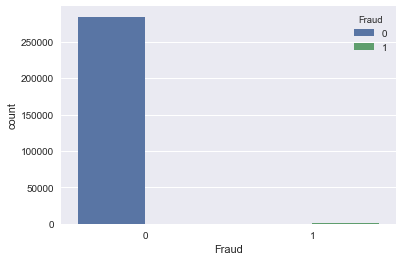

In [13]:
# Checking the target class
sns.countplot(x="Fraud",data=cred_data,hue="Fraud")

# Supervised learning

## k-Nearest Neighbors
Basic idea: Predict the label of a data point by
- Looking at the ‘k’ closest labeled data points
- Taking a majority vote

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_classification_001.png" width="400">

source:
*http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py*.
*https://www.datacamp.com*




### Import modules

In [14]:
from sklearn.neighbors import KNeighborsClassifier

### Define Features
        Supervised learning consists in learning the link between two datasets: the observed data X and an external variable y that we are trying to predict, usually called “target” or “labels”. Most often, y is a 1D array of length n_samples.
        All supervised estimators in scikit-learn implement a fit(X, y) method to fit the model and a predict(X) method that, given unlabeled observations X, returns the predicted labels y.

source:
*http://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification*.

In [15]:
# labels
y_target = cred_data['Fraud']

# unlabeled observations
X_data = cred_data.drop(['Fraud'], axis=1)

# Measuring model performance
- In classification, accuracy is a commonly used metric 
- Accuracy = Fraction of correct predictions
- Split data into training and test set
 - Fit/train the classifier on the training set
 - Make predictions on test set
 - Compare predictions with the known labels

source: *https://www.datacamp.com*

### Train/test split

#### Import Modules

In [16]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X_data,y_target,test_size=0.3,
                                                random_state=21,stratify=y_target)

### Fit a classifier
    Training a model on the data = ‘fiting’ a model to the data: 
- .fit() method


In [55]:
# I chose an odd value in K to avoid tie in the vote.
knn = KNeighborsClassifier(n_neighbors=3)

# fit() method
knn.fit(X_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

### Predicting on unlabeled data
    To predict the labels of new data: 
- .predict() method

In [56]:
y_pred = knn.predict(X_test)

### Accuracy

In [77]:
knn.score(X_test, y_test)

0.99852533267792565